In [1]:
"""
Created on 20200526
improved QPCA via threshold
"""
%matplotlib inline
import numpy as np 
import qiskit
import math
import numpy as np
from scipy.linalg import sqrtm

import qiskit 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit,Aer

import numpy as np

from qiskit import BasicAer, execute,IBMQ
from qiskit.tools.visualization import plot_histogram

import qiskit.quantum_info
from  qiskit.quantum_info import DensityMatrix,random_density_matrix,purity

In [2]:
import numpy as np
A=np.array([0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,3])
state_vector=np.sqrt(1/np.sum(A*A))*A
print(state_vector)

[0.         0.         0.         0.         0.         0.26726124
 0.         0.         0.         0.         0.53452248 0.
 0.         0.         0.         0.80178373]


In [3]:
q = QuantumRegister(8)
c = ClassicalRegister(8)
qc = QuantumCircuit(q,c)

In [4]:
qc.initialize(state_vector,[q[3],q[4],q[5],q[6]])

In [5]:
#phase estimation
qc.h(q[1])
qc.h(q[2])

qc.x(q[3])
qc.cu1(math.pi/4,q[3],q[4])
qc.cx(q[2],q[3])
qc.cu1(-math.pi/4,q[3],q[4])
qc.cx(q[2],q[3])
qc.cu1(math.pi/4,q[2],q[4])
qc.x(q[3])

qc.cy(q[3],q[4])
qc.cx(q[3],q[4])
qc.cx(q[2],q[3])
qc.cx(q[3],q[4])
qc.cy(q[3],q[4])
qc.cx(q[2],q[3])
qc.cy(q[2],q[4])
qc.cx(q[2],q[4])
qc.cu1(math.pi/4,q[3],q[4])
qc.cx(q[2],q[3])
qc.cu1(-math.pi/4,q[3],q[4])
qc.cx(q[2],q[3])
qc.cu1(math.pi/4,q[2],q[4])

qc.cy(q[1],q[3])
qc.cx(q[1],q[3])
qc.cx(q[4],q[1])
qc.cx(q[1],q[3])
qc.cy(q[1],q[3])
qc.cx(q[4],q[1])
qc.cy(q[4],q[3])
qc.cx(q[4],q[3])

qc.swap(q[1],q[2])
qc.h(q[2])
qc.cu1(-math.pi/2,q[1],q[2])
qc.h(q[1])

qc.barrier(q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7])

In [6]:
#transition（00,00,10,11）
qc.x(q[2])
qc.ccx(q[1],q[2],q[7])
qc.x(q[2])
qc.cx(q[7],q[1])
qc.barrier(q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7])

In [7]:
# Anc qubit cont operation
qc.x(q[1])
qc.x(q[2])
qc.ccx(q[1],q[2],q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[0])
qc.barrier(q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7])

In [8]:
#transition reverse
qc.cx(q[7],q[1])
qc.x(q[2])
qc.ccx(q[1],q[2],q[7])
qc.x(q[2])
qc.barrier(q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7])

In [9]:
#reverse phase estiamtion
qc.h(q[1])
qc.cu1(math.pi/2,q[1],q[2])
qc.h(q[2])
qc.swap(q[1],q[2])

qc.cx(q[4],q[3])
qc.cy(q[4],q[3])
qc.cx(q[4],q[1])
qc.cy(q[1],q[3])
qc.cx(q[1],q[3])
qc.cx(q[4],q[1])
qc.cx(q[1],q[3])
qc.cy(q[1],q[3])

qc.cu1(-math.pi/4,q[2],q[4])
qc.cx(q[2],q[3])
qc.cu1(math.pi/4,q[3],q[4])
qc.cx(q[2],q[3])
qc.cu1(-math.pi/4,q[3],q[4])
qc.cx(q[2],q[4])
qc.cy(q[2],q[4])
qc.cx(q[2],q[3])
qc.cy(q[3],q[4])
qc.cx(q[3],q[4])
qc.cx(q[2],q[3])
qc.cx(q[3],q[4])
qc.cy(q[3],q[4])

qc.x(q[3])
qc.cu1(-math.pi/4,q[2],q[4])
qc.cx(q[2],q[3])
qc.cu1(math.pi/4,q[3],q[4])
qc.cx(q[2],q[3])
qc.cu1(-math.pi/4,q[3],q[4])
qc.x(q[3])

qc.h(q[1])
qc.h(q[2])

qc.barrier(q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7])

In [10]:
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])
qc.measure(q[3],c[3])
qc.measure(q[4],c[4])
qc.measure(q[5],c[5])
qc.measure(q[6],c[6])

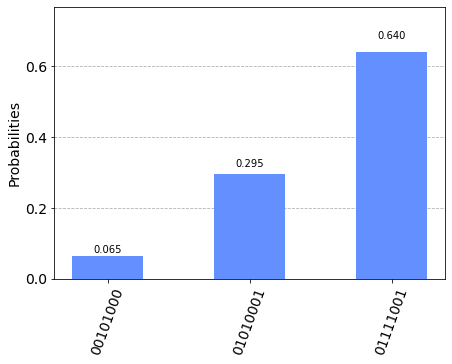

In [11]:
backend_qasm=BasicAer.get_backend('qasm_simulator')
job_qasm=execute(qc,backend_qasm,shots=1024*4)
result_qasm=job_qasm.result()
counts=result_qasm.get_counts(qc)
# print(counts)
plot_histogram(counts)

In [12]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[8];
creg c0[8];
initialize(0,0,0,0,0,0.26726124,0,0,0,0,0.53452248,0,0,0,0,0.80178373) q0[3],q0[4],q0[5],q0[6];
h q0[1];
h q0[2];
x q0[3];
cu1(pi/4) q0[3],q0[4];
cx q0[2],q0[3];
cu1(-pi/4) q0[3],q0[4];
cx q0[2],q0[3];
cu1(pi/4) q0[2],q0[4];
x q0[3];
cy q0[3],q0[4];
cx q0[3],q0[4];
cx q0[2],q0[3];
cx q0[3],q0[4];
cy q0[3],q0[4];
cx q0[2],q0[3];
cy q0[2],q0[4];
cx q0[2],q0[4];
cu1(pi/4) q0[3],q0[4];
cx q0[2],q0[3];
cu1(-pi/4) q0[3],q0[4];
cx q0[2],q0[3];
cu1(pi/4) q0[2],q0[4];
cy q0[1],q0[3];
cx q0[1],q0[3];
cx q0[4],q0[1];
cx q0[1],q0[3];
cy q0[1],q0[3];
cx q0[4],q0[1];
cy q0[4],q0[3];
cx q0[4],q0[3];
swap q0[1],q0[2];
h q0[2];
cu1(-pi/2) q0[1],q0[2];
h q0[1];
barrier q0[0],q0[1],q0[2],q0[3],q0[4],q0[5],q0[6],q0[7];
x q0[2];
ccx q0[1],q0[2],q0[7];
x q0[2];
cx q0[7],q0[1];
barrier q0[0],q0[1],q0[2],q0[3],q0[4],q0[5],q0[6],q0[7];
x q0[1];
x q0[2];
ccx q0[1],q0[2],q0[0];
x q0[1];
x q0[2];
x q0[0];
barrier q0[0],q0[1],q0[2],q0[3],q0[4],q0[5],q0[6]

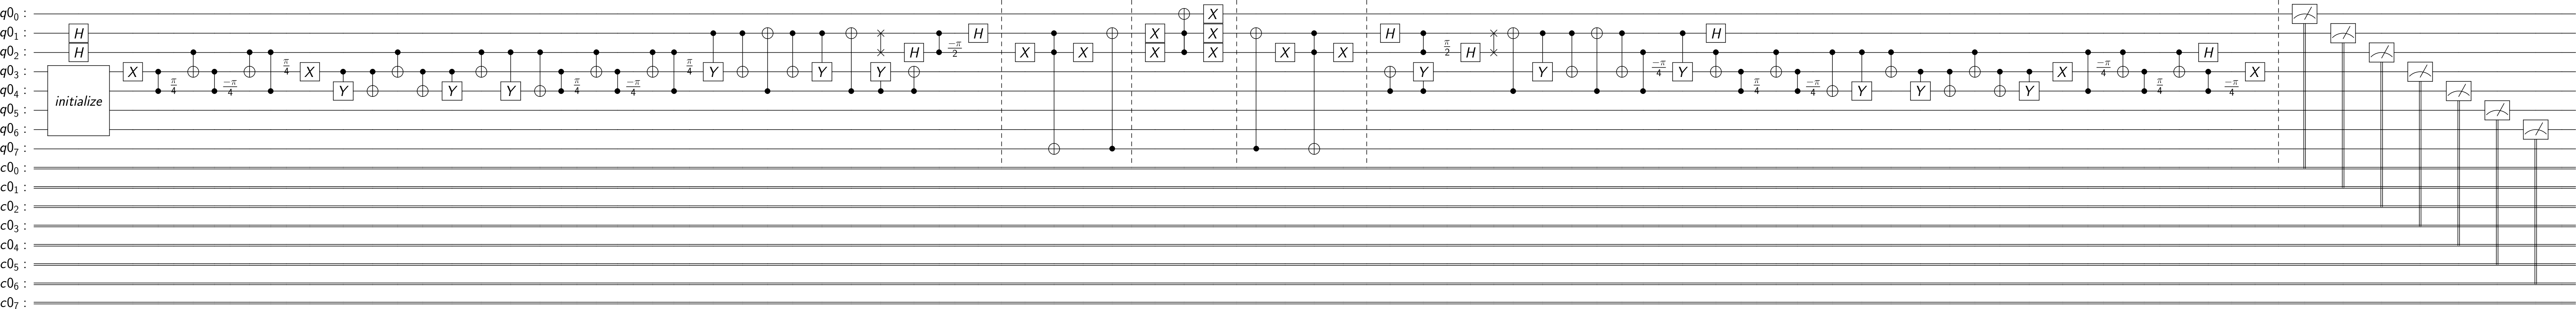

In [16]:
qc.draw("latex")